# Comparing vertical resolutions OM2-025 and OM2-01

This notebook is an initial analysis, as a part of the DSW collaborative project


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
#import netCDF4
import cmocean as cm
import xarray as xr
import numpy as np
import IPython.display
import cartopy.crs as ccrs
import cartopy.feature as cft
import os

In [2]:
#importing the topography under KDS75 and KDS75_5mdz
KDS75_topo = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_08022019/mom_01deg/topog.nc')

In [3]:
KDS75_topo

<xarray.Dataset>
Dimensions:  (yy: 2700, xx: 3600)
Dimensions without coordinates: yy, xx
Data variables:
    depth    (yy, xx) float32 ...
Attributes:
    original_file:  topog_190717_deseas_m7_par_nonadv.nc
    history:        2018-10-23T22:00:44.500081: /home/nic/anaconda3/bin/pytho...
    creation_date:  Thu Dec 13 17:49:32 AEDT 2018

In [4]:
#replacing_values lower than 25
KDS75_topo2 = KDS75_topo
#KDSmask=KDS75_topo.isnull()
KDS75_topo2 = KDS75_topo2.where((KDS75_topo2 >= 21.42501016313645) | (KDS75_topo2 == 0) | KDS75_topo2.isnull(),other=21.42501016313645)
KDS75_topo2 = KDS75_topo2.where(KDS75_topo2.notnull(),other=-1.e30)
KDS75_topo2.depth.attrs['minimum_depth'] = np.array(21.42501016313645)
KDS75_topo2.depth.attrs['minimum_levels']= np.int32(4)

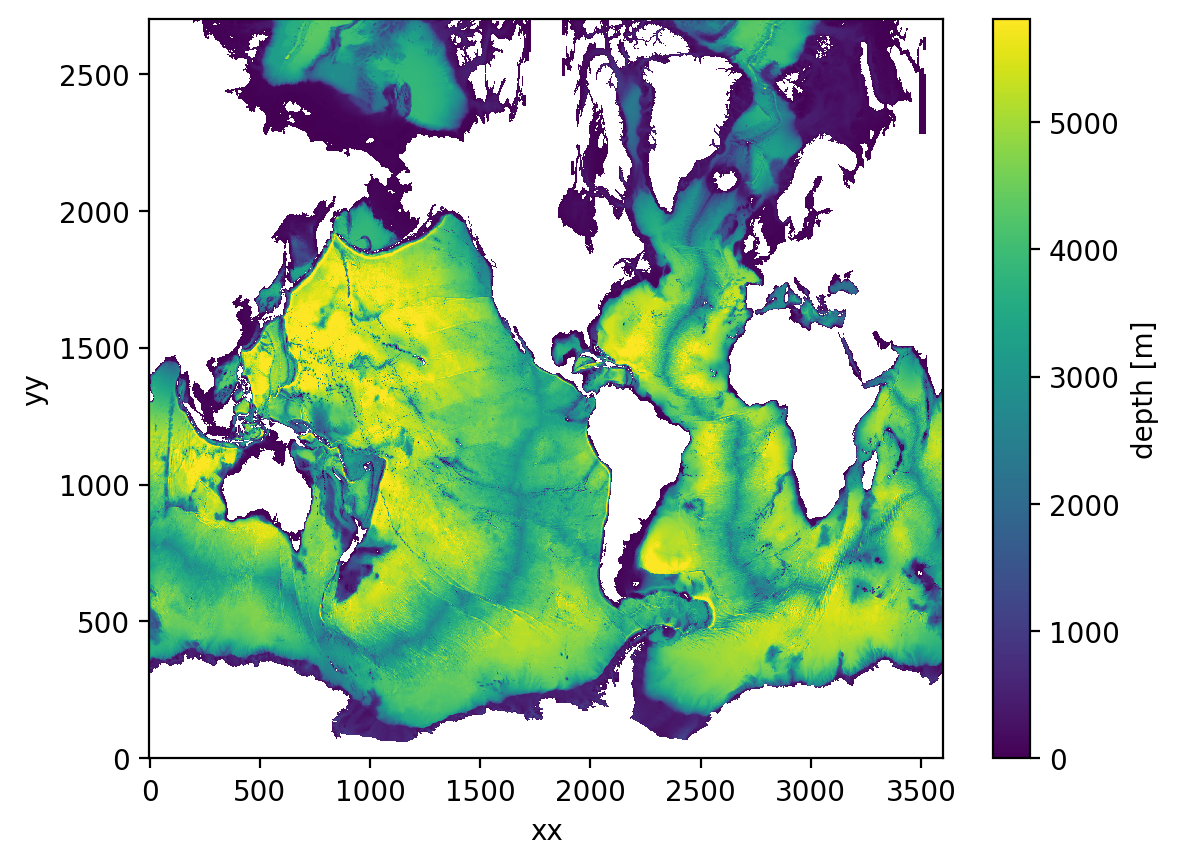

In [5]:
KDS75_topo['depth'].plot()

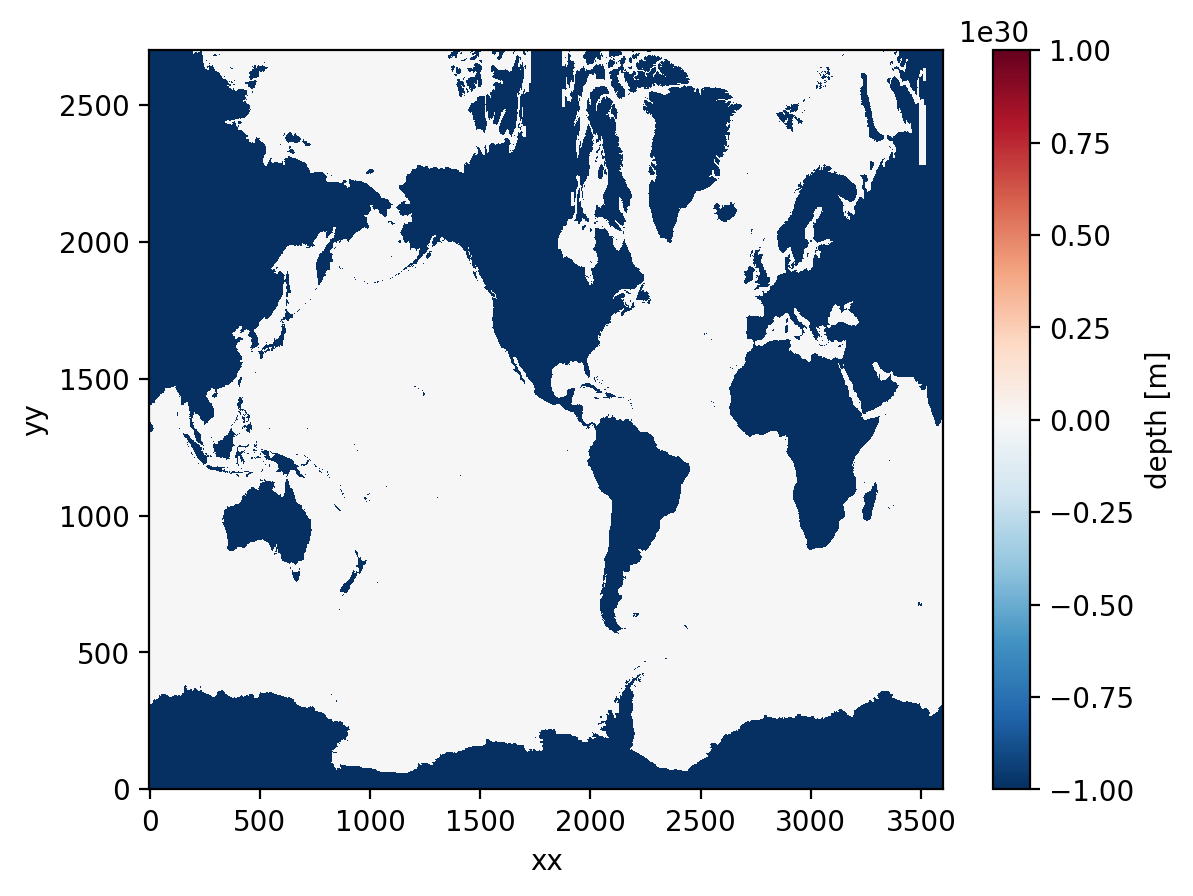

In [6]:
KDS75_topo2['depth'].plot()

In [7]:
KDS75_topo2['depth'].max()

<xarray.DataArray 'depth' ()>
array(5808.65673828)

In [8]:
Deltadepth=KDS75_topo2 -KDS75_topo
Deltadepth

<xarray.Dataset>
Dimensions:  (yy: 2700, xx: 3600)
Dimensions without coordinates: yy, xx
Data variables:
    depth    (yy, xx) float32 nan nan nan nan nan nan ... nan nan nan nan nan

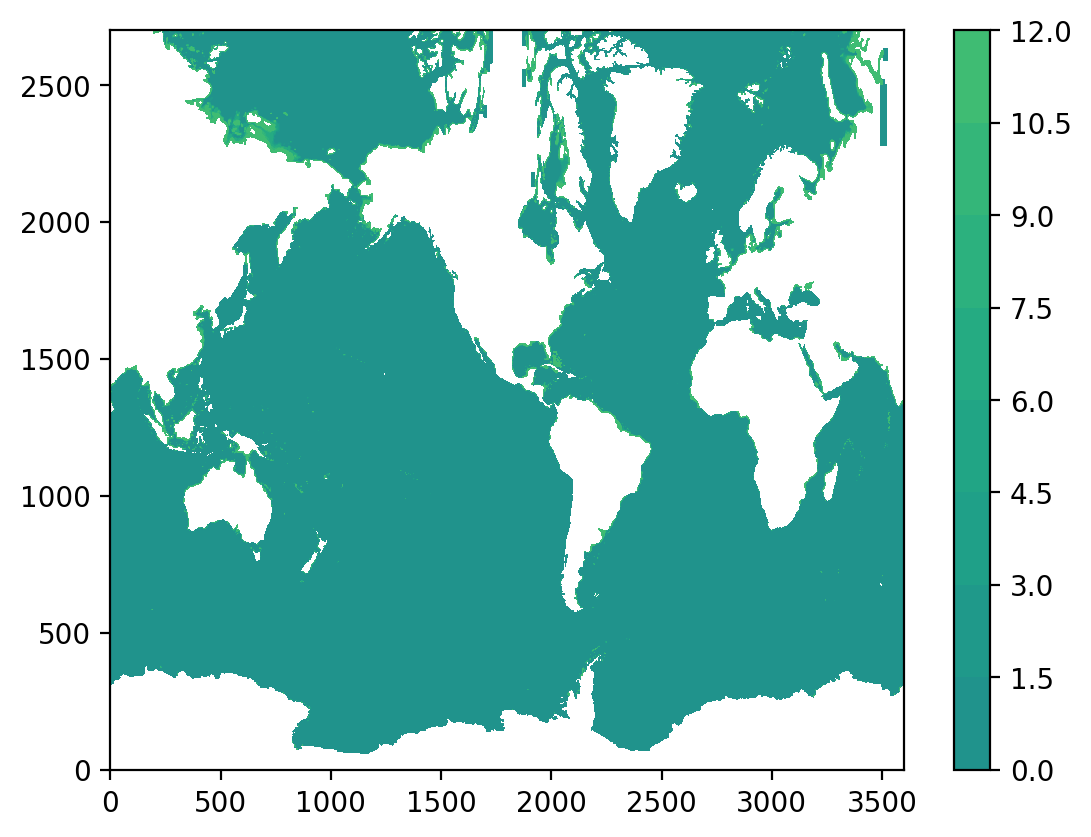

In [9]:
plt.contourf(Deltadepth['xx'],Deltadepth['yy'],Deltadepth['depth'],vmin=-30,vmax=30)
plt.colorbar()


In [10]:
#encoding = { 'depth': {'_FillValue': -1.e+30}}
#enc={"_FillValue": -1e30}
KDS75_topo2.depth.attrs['_FillValue']=-1.e+30
#KDS75_topo2.to_netcdf('/g/data/v45/wf4500/DSW_collaborative/topog_KDZ75_5mdz/topog_kds5mdz2.nc',encoding={"depth": enc})
KDS75_topo2.to_netcdf('/g/data/v45/wf4500/DSW_collaborative/topog_KDZ75_5mdz/topog_kds5mdz2.nc')

In [11]:
hgrid = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/ocean_grid.nc')
hgrid=hgrid.rename({'xt_ocean': 'xx','yt_ocean': 'yy'})
Deltadepth2 = Deltadepth
#y_ds = xr.Dataset({'y': y}).set_coords('y')
Deltadepth2['geolon_t']=hgrid['geolon_t']
Deltadepth2['geolat_t']=hgrid['geolat_t']
Deltadepth2


#Deltadepth3 = xr.Dataset(coords={'xx','yy'}),
#                 data_vars=hgrid['geolon_t'])
#Deltadepth3

MergeError: unable to determine if these variables should be coordinates or not in the merged result: {'geolon_t'}

In [12]:
Deltadepth2

<xarray.Dataset>
Dimensions:   (yy: 2700, xx: 3600)
Coordinates:
  * xx        (xx) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yy        (yy) float64 -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
    geolat_t  (yy, xx) float32 ...
Data variables:
    depth     (yy, xx) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    geolon_t  (yy, xx) float32 ...

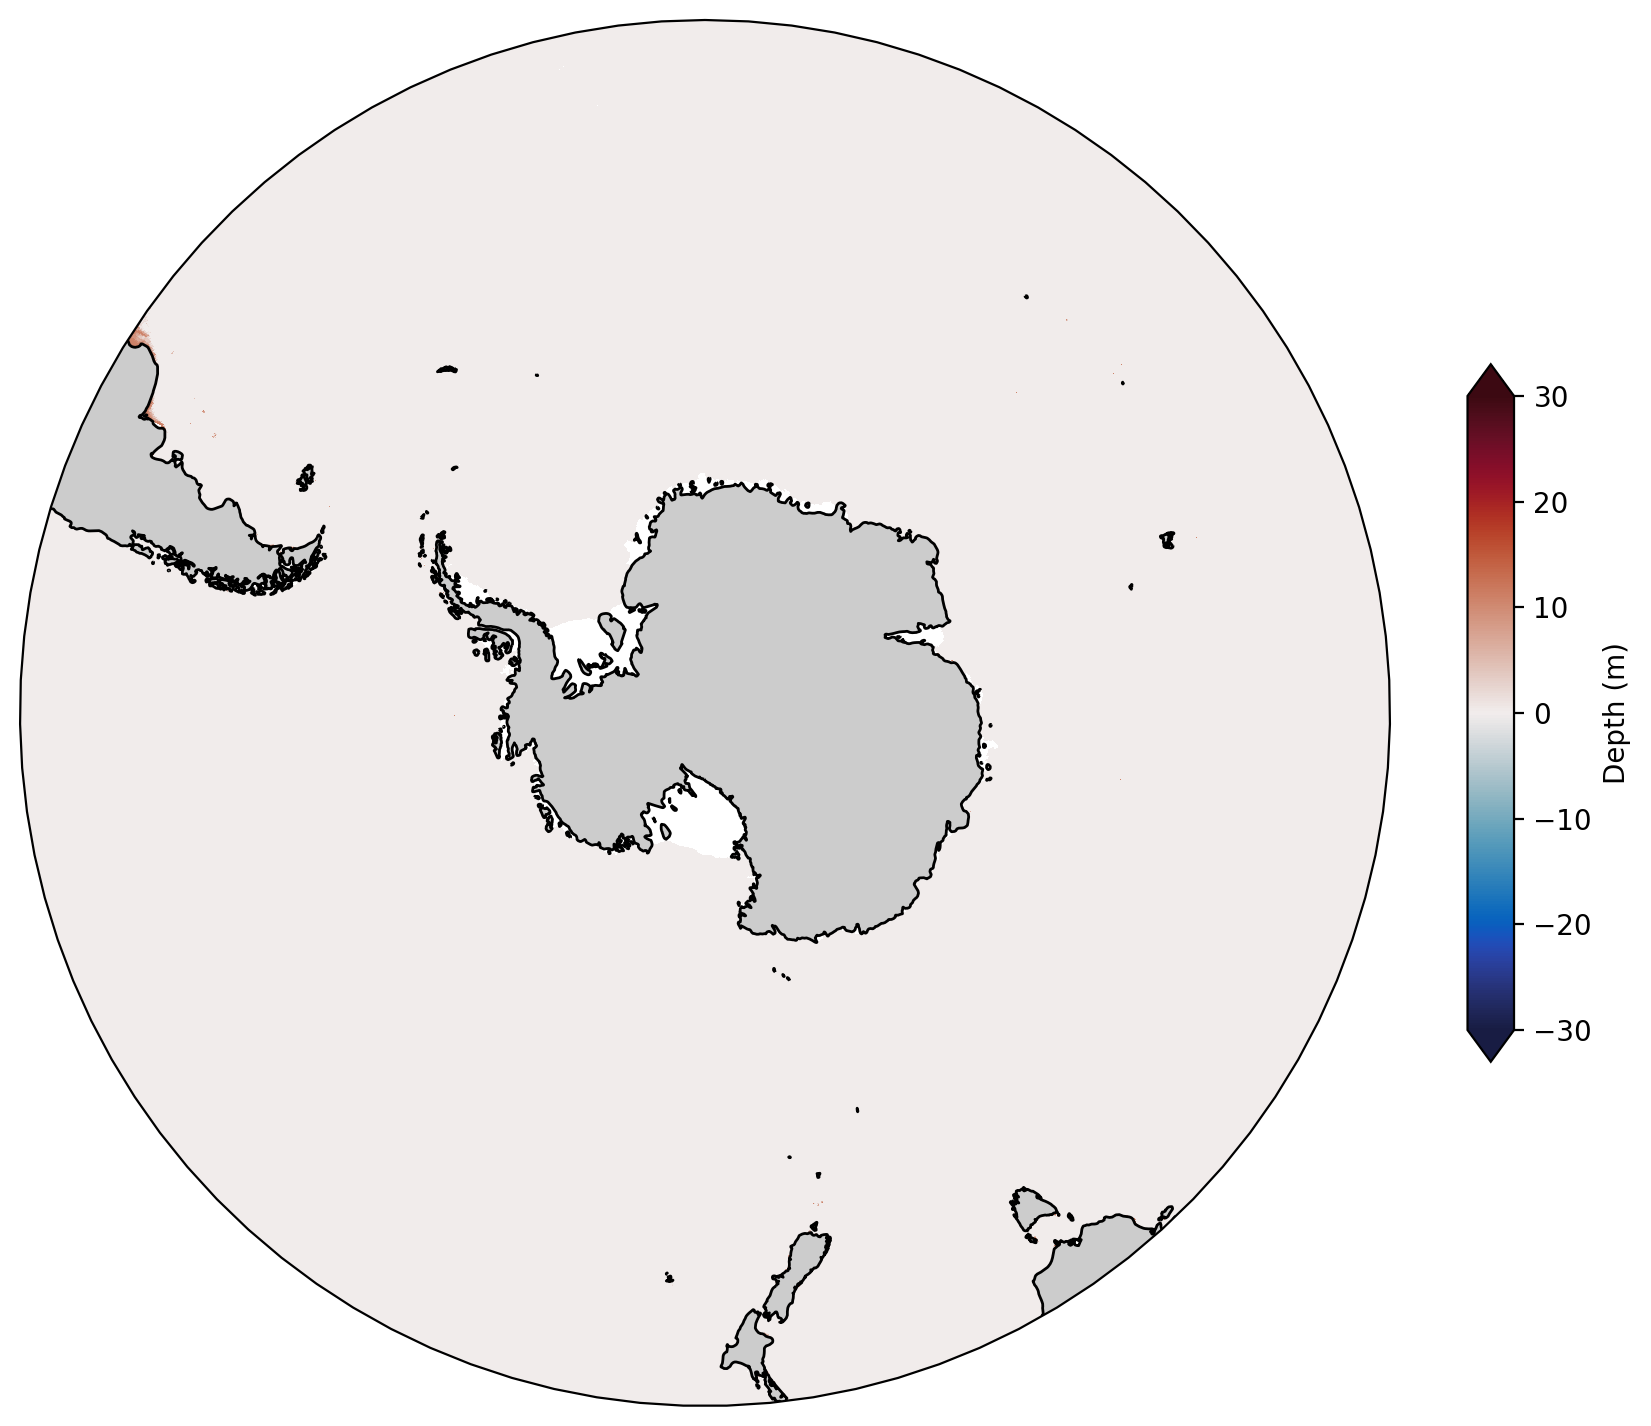

In [13]:


land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='papayawhip', linewidth=0.5)

projection = ccrs.SouthPolarStereo()

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -35], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.

import matplotlib.path as mpath

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

Deltadepth2['depth'].plot(x='xx', y='yy',
         transform=ccrs.PlateCarree(),
         vmin=-30, vmax=30, extend='both',
         cmap=cm.cm.balance,
         cbar_kwargs = {'label': 'Depth (m)',
                        'fraction': 0.03,
                        'aspect': 15,
                        'shrink': 0.7});

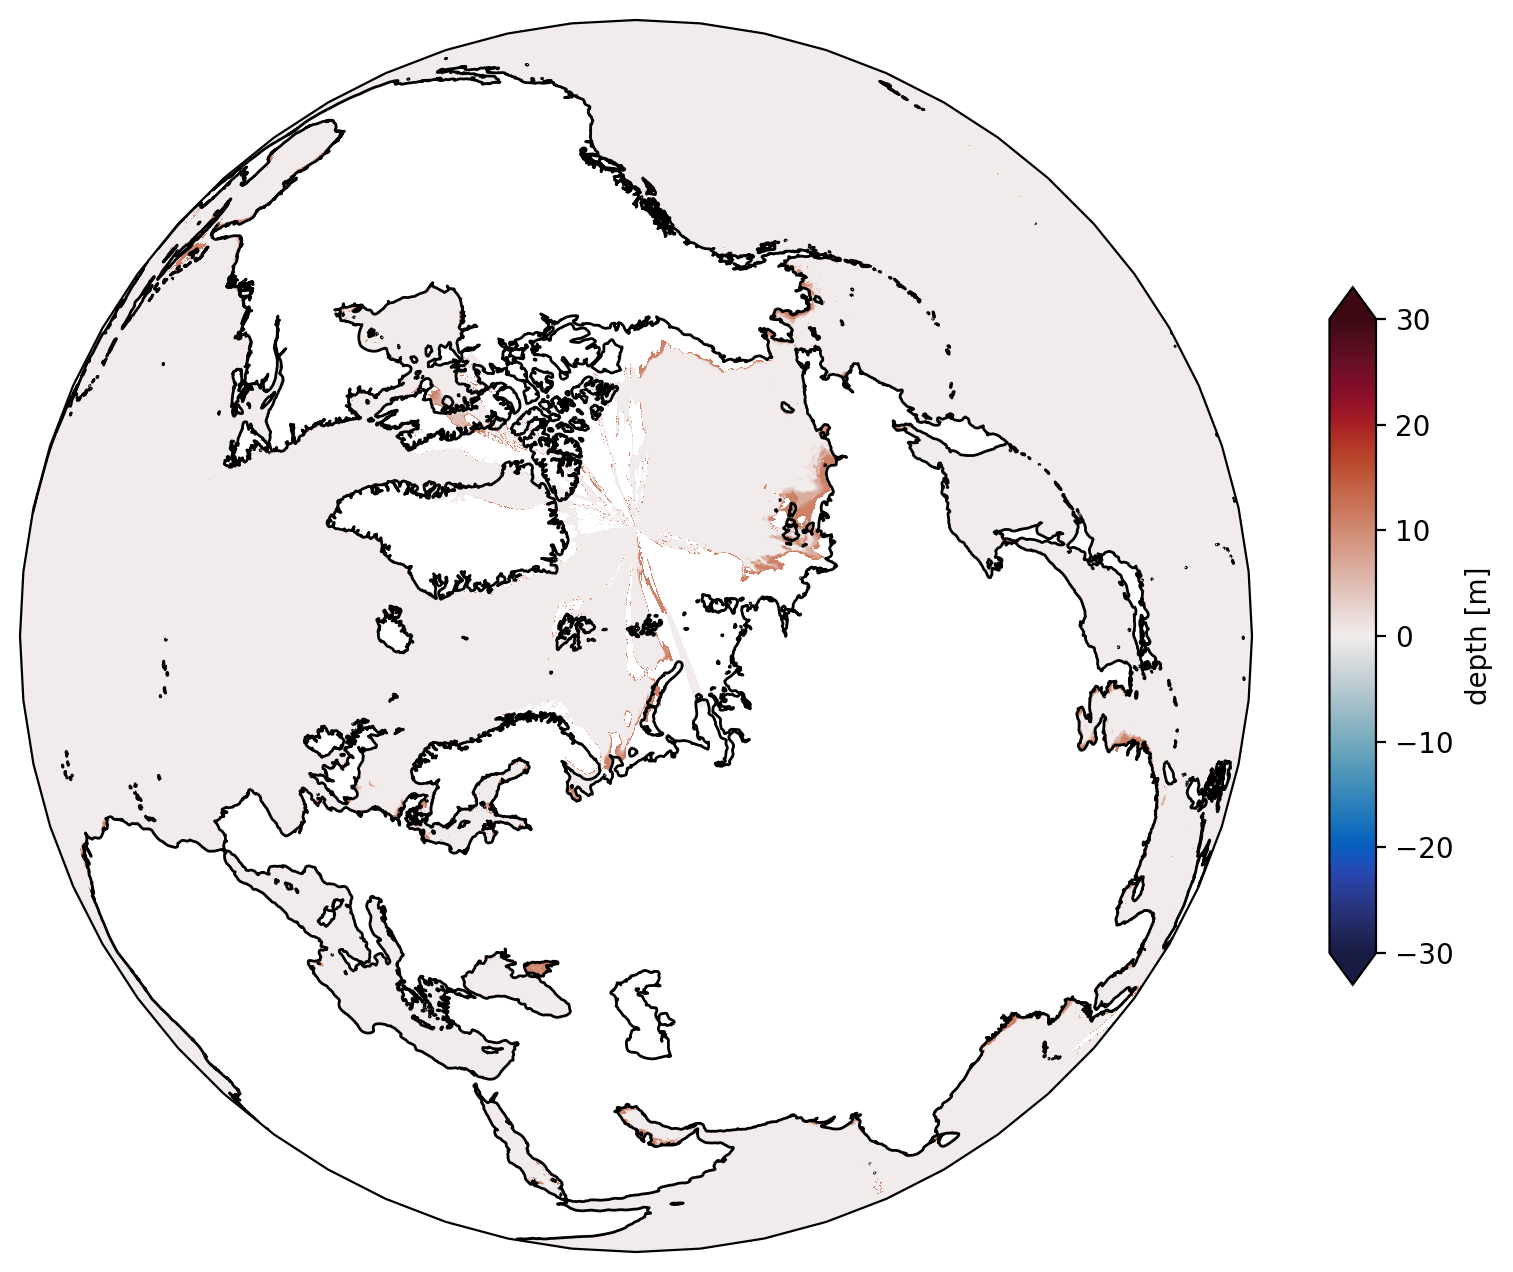

In [14]:
projection = ccrs.Orthographic(central_latitude=80, central_longitude=50)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)

ax.coastlines(resolution='50m');

Deltadepth2['depth'].plot(x='xx', y='yy',
         transform=ccrs.PlateCarree(),
         vmin=-30, vmax=30, extend='both',
         cmap=cm.cm.balance,
         cbar_kwargs = {'label': 'depth [m]',
                        'fraction': 0.03,
                        'aspect': 15,
                        'shrink': 0.7});

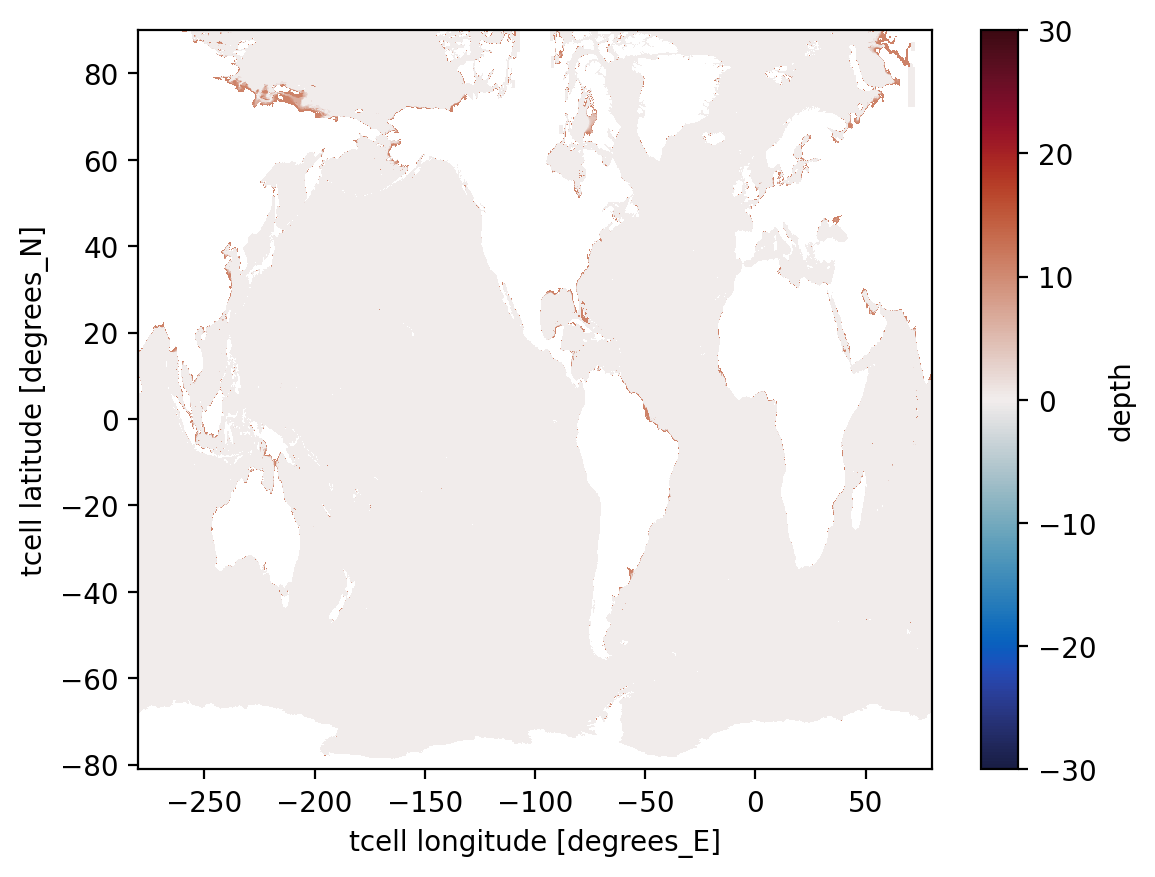

In [15]:
os.chdir('/g/data/v45/wf4500/DSW_collaborative/topog_KDZ75_5mdz/')
Deltadepth2['depth'].plot(vmin=-30, vmax=30,cmap=cm.cm.balance)
plt.savefig('Dbath_global.png')

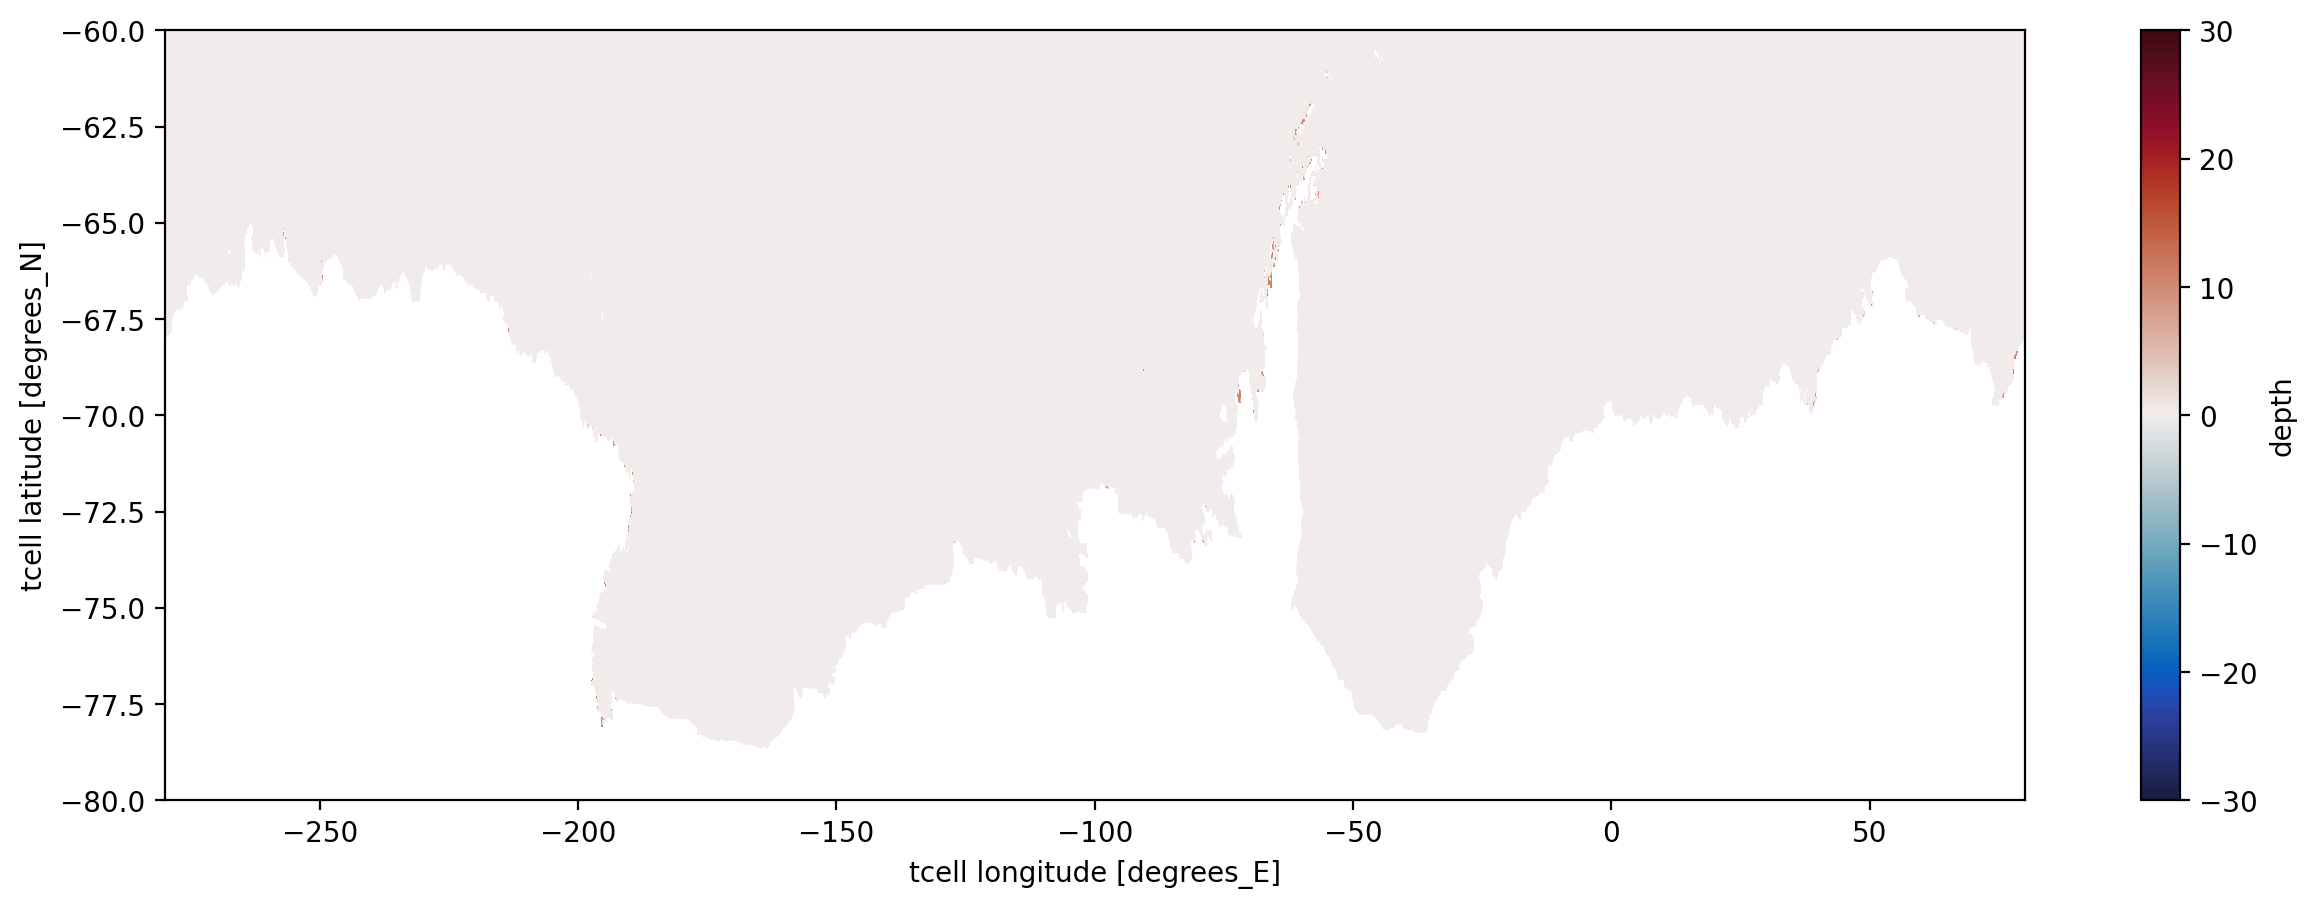

In [16]:
plt.figure(figsize=(15, 5))
Deltadepth2['depth'].plot(vmin=-30, vmax=30,cmap=cm.cm.balance)
plt.ylim([-80,-60])
plt.savefig('Dbath_Antarctica.png')